In [1]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick

import sys
sys.path.append('../models')
import utils

train_traces_categorical2011 = utils.load_trace_dataset('../logs/bpic2011', 'categorical', 'train')
train_traces_categorical2012 = utils.load_trace_dataset('../logs/bpic2012', 'categorical', 'train')
train_traces_categorical2017 = utils.load_trace_dataset('../logs/bpic2017', 'categorical', 'train')

train_traces_categorical2015_1 = utils.load_trace_dataset('../logs/bpic2015_1', 'categorical', 'train')
train_traces_categorical2015_2 = utils.load_trace_dataset('../logs/bpic2015_2', 'categorical', 'train')
train_traces_categorical2015_3 = utils.load_trace_dataset('../logs/bpic2015_3', 'categorical', 'train')
train_traces_categorical2015_4 = utils.load_trace_dataset('../logs/bpic2015_4', 'categorical', 'train')
train_traces_categorical2015_5 = utils.load_trace_dataset('../logs/bpic2015_5', 'categorical', 'train')
helpdesk_traces_categorical = utils.load_trace_dataset('../logs/helpdesk', 'categorical', 'train')

Using TensorFlow backend.


In [52]:
current_palette = "OrRd"

sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=3)
sns.set_style('white', {'axes.axisbelow': True,
                        'axes.edgecolor': 'black',
                        'axes.facecolor': 'white',
                        'axes.grid': True})

hpi_orange = '#dd6108'
hpi_blue = '#007a9e'
hpi_red = '#b1063a'
hpi_yellow = '#f6a800'
hpi_gray = '#5a6065'

# Trace length distribution

In [311]:
for tls in [trace_lengths2011,trace_lengths2012,trace_lengths2015_1,trace_lengths2015_2,trace_lengths2015_3,trace_lengths2015_4,trace_lengths2015_5]:
    ml = np.ceil(np.percentile(tls, 80))
    omitted = np.sum(list(map(lambda x: x>ml, tls)))
    totalts = len(tls)
    print(omitted, totalts, omitted/totalts*100)

171 857 19.953325554259045
1781 9815 18.14569536423841
172 899 19.13236929922136
124 624 19.871794871794872
206 1056 19.507575757575758
155 789 19.64512040557668
167 867 19.261822376009228


In [8]:
for tls in [trace_lengths2011,trace_lengths2012,trace_lengths2015_1,trace_lengths2015_2,trace_lengths2015_3,trace_lengths2015_4,trace_lengths2015_5]:
    unique, counts = np.unique(tls, return_counts=True)
    print("{0:.3f} \plusminus {1:.3f}".format(np.mean(counts), np.std(counts)))

2.801 \plusminus 4.992
129.145 \plusminus 333.584
10.333 \plusminus 11.454
6.178 \plusminus 7.571
12.279 \plusminus 19.285
9.174 \plusminus 14.590
9.527 \plusminus 14.362


In [3]:
trace_lengths2011 = [ len(t) for t in train_traces_categorical2011 ]
trace_lengths2012 = [ len(t) for t in train_traces_categorical2012 ]
trace_lengths2017 = [ len(t) for t in train_traces_categorical2017 ]
trace_lengths2015_1 = [ len(t) for t in train_traces_categorical2015_1 ]
trace_lengths2015_2 = [ len(t) for t in train_traces_categorical2015_2 ]
trace_lengths2015_3 = [ len(t) for t in train_traces_categorical2015_3 ]
trace_lengths2015_4 = [ len(t) for t in train_traces_categorical2015_4 ]
trace_lengths2015_5 = [ len(t) for t in train_traces_categorical2015_5 ]

trace_length_ylabel = 'Trace count'
trace_length_xlabel =  'Length of a trace'

In [280]:
import statistics
for tl in [trace_lengths2012,trace_lengths2015_4,trace_lengths2015_3,trace_lengths2015_5,trace_lengths2015_1,trace_lengths2015_2, trace_lengths2011]:
    print("{:.2f}".format(statistics.stdev(tl)))

11.33
14.63
16.05
15.82
16.74
20.32
194.01


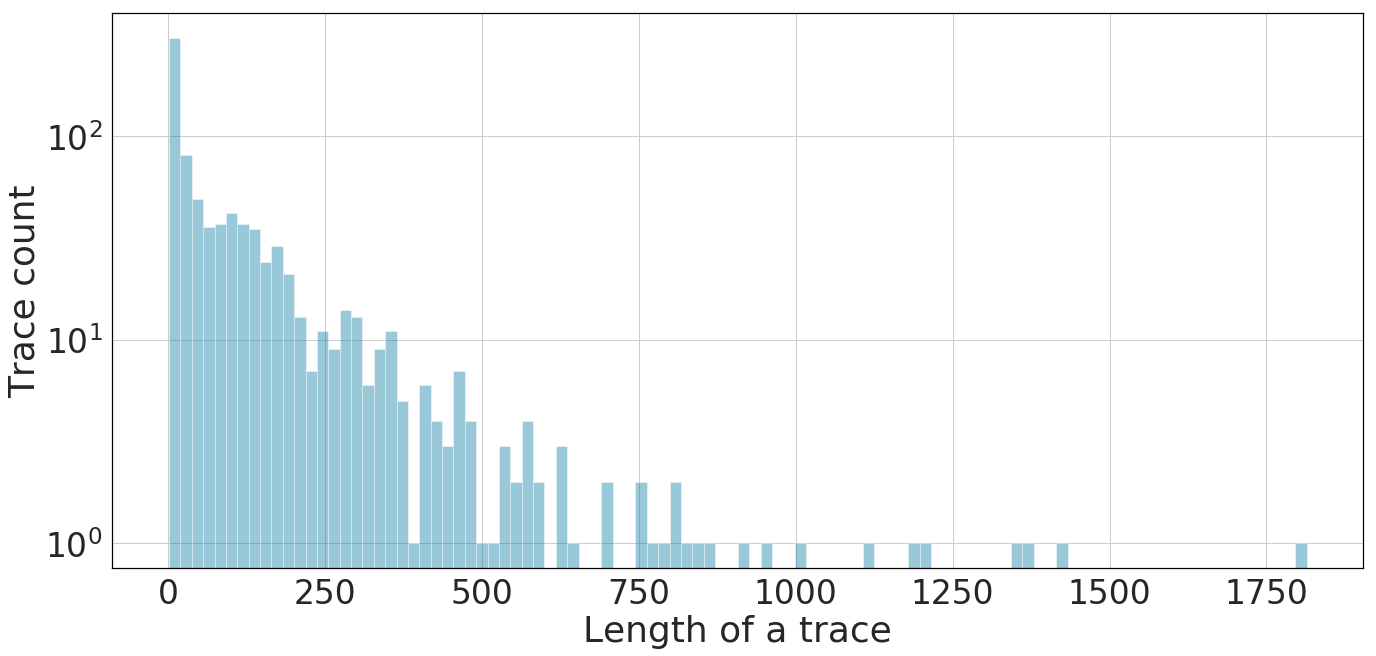

In [80]:
plotax = sns.distplot(trace_lengths2011, bins=100, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel, yscale="log")
plt.tight_layout()
plt.savefig("bpic11-length-frequency.pdf")

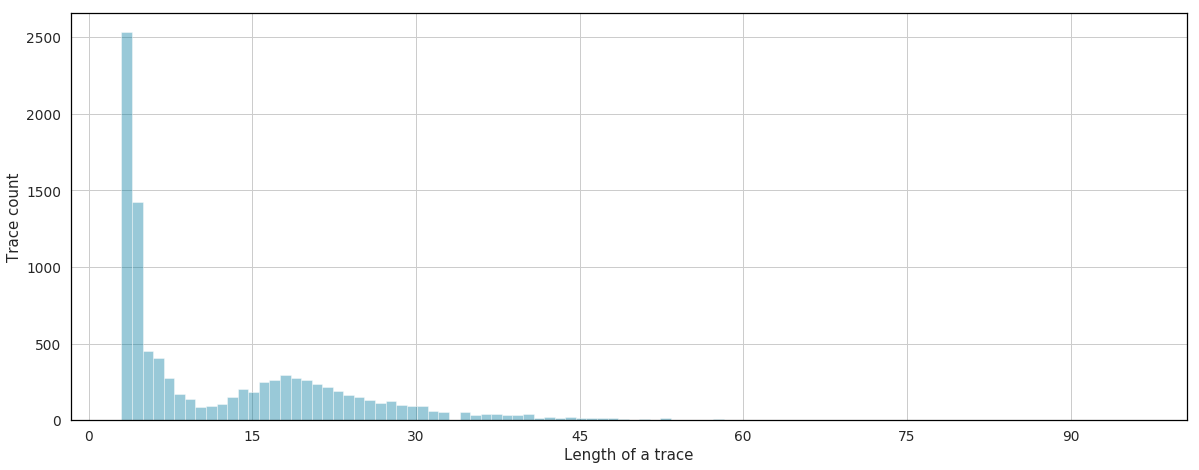

In [132]:
plotax = sns.distplot(trace_lengths2012, bins=96, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
plotax.xaxis.set_major_locator(MaxNLocator(integer=True))

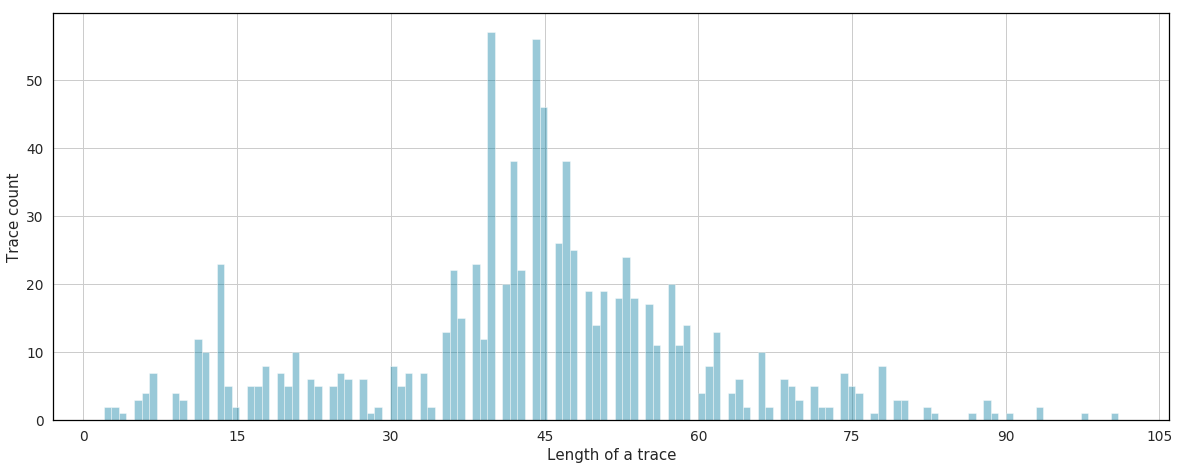

In [185]:
plotax = sns.distplot(trace_lengths2015_1, bins=135, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
plotax.xaxis.set_major_locator(MaxNLocator(integer=True))

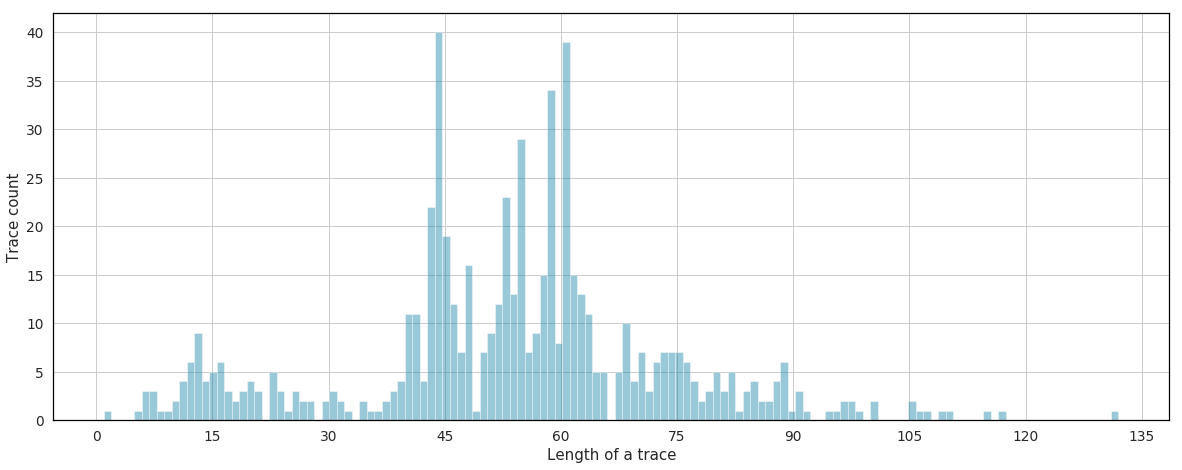

In [135]:
plotax = sns.distplot(trace_lengths2015_2, bins=135, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
plotax.xaxis.set_major_locator(MaxNLocator(integer=True))

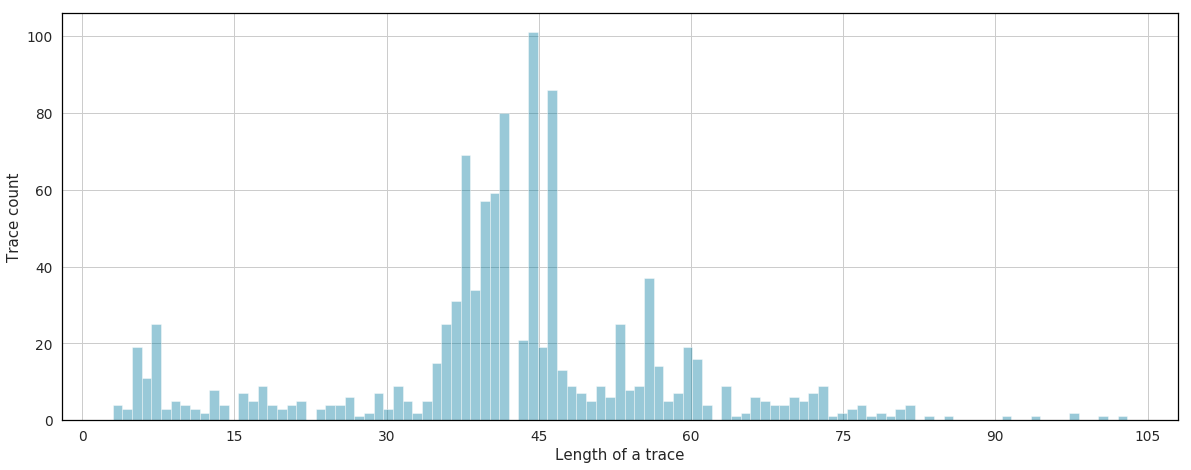

In [136]:
plotax = sns.distplot(trace_lengths2015_3, bins=105, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
plotax.xaxis.set_major_locator(MaxNLocator(integer=True))

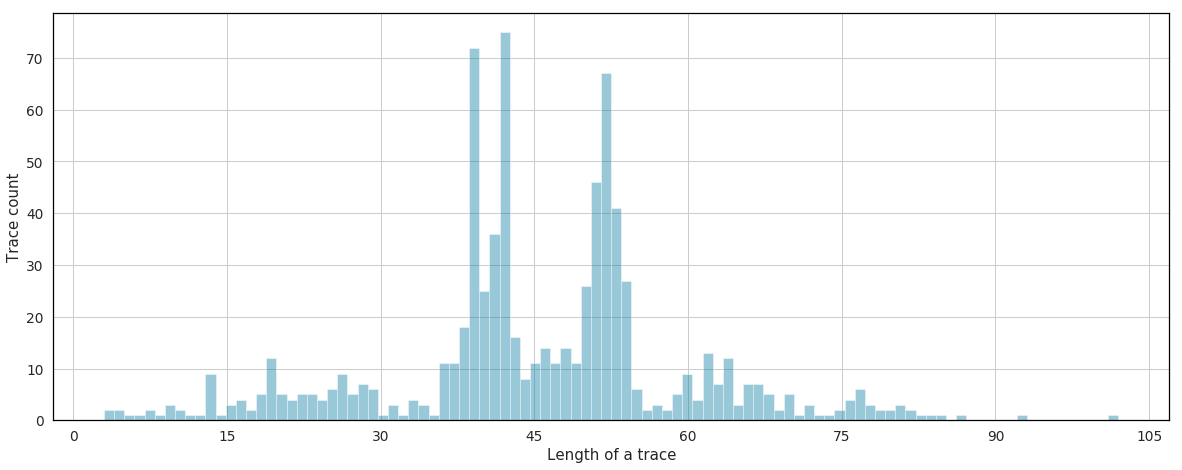

In [137]:
plotax = sns.distplot(trace_lengths2015_4, bins=100, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
plotax.xaxis.set_major_locator(MaxNLocator(integer=True))

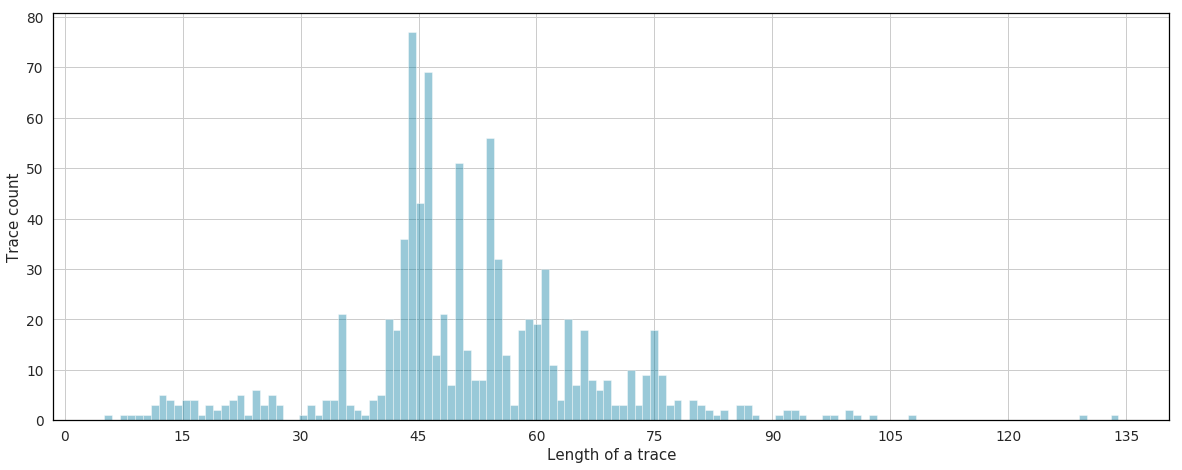

In [138]:
plotax = sns.distplot(trace_lengths2015_5, bins=130, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
plotax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Test for variance improvement with grouping strategy

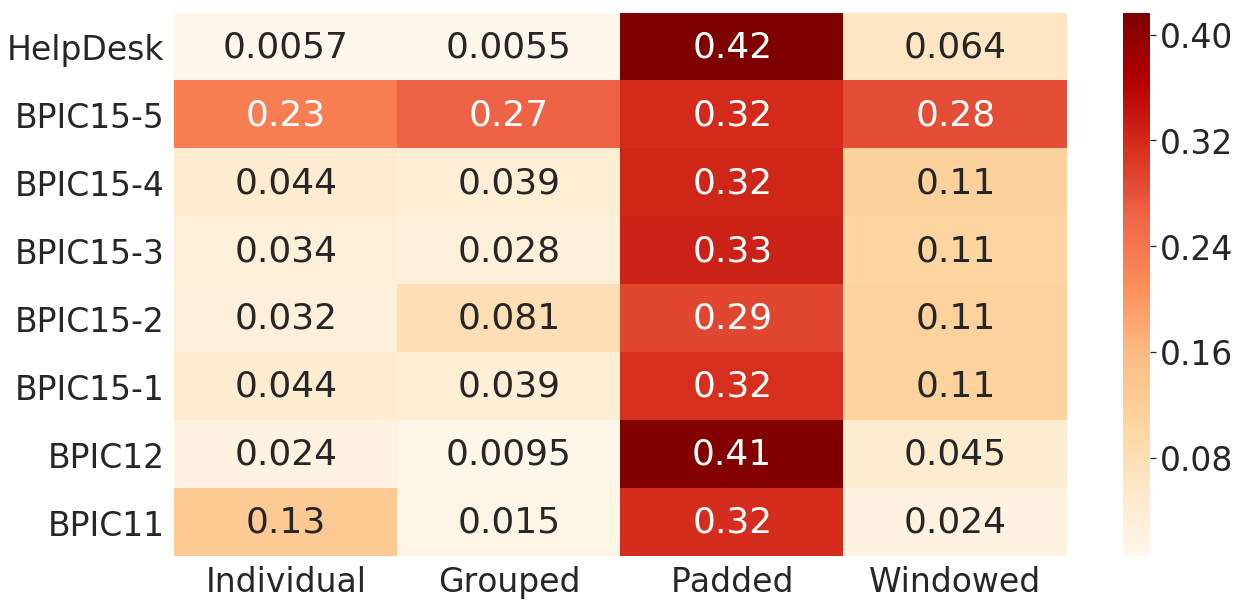

In [72]:
model_fns = ['evermann','schoenig', 'sp2', 'pfs']
mode_fns  = ['individual', 'grouped', 'padded', 'windowed']
name_mapping = {
    'helpdesk': 'HelpDesk',
    'bpic2015_5': 'BPIC15-5',
    'bpic2015_4': 'BPIC15-4',
    'bpic2015_3': 'BPIC15-3',
    'bpic2015_2': 'BPIC15-2',
    'bpic2015_1': 'BPIC15-1',
    'bpic2012': 'BPIC12',
    'bpic2011': 'BPIC11'
}

def get_max_accuracies(dataset_name):
    df = pd.DataFrame(columns=['Model', 'Strategy', 'Accuracy'])
    
    for mdl in model_fns:
        for mdo in mode_fns:
            stats_df = pd.read_pickle('/home/felix.wolff2/docker_share/{0}/{1}_{2}_stats.pickled'.format(dataset_name, mdl, mdo))
            acc = stats_df['val_acc'].max()
            df = df.append({'Model': mdl, 'Strategy': mdo, 'Accuracy': acc}, ignore_index=True)

    return df

def build_std_df(listOfDataSetNames):
    treatDsName = lambda x: name_mapping[x]
    treatModeName = lambda x: x.capitalize()
    cols = list(map(treatModeName, mode_fns))
    ds_index = list(map(treatDsName, listOfDataSetNames))
    df = pd.DataFrame(columns=cols, index=ds_index, dtype=np.float)

    for ds_name in listOfDataSetNames:
        max_acc_df = get_max_accuracies(ds_name)
        
        for mdo in mode_fns:
            variance = max_acc_df[max_acc_df['Strategy'] == mdo]['Accuracy'].std()
            df.loc[treatDsName(ds_name), treatModeName(mdo)] = variance
            
        #df.loc[ds_name] = df.loc[ds_name] / df.loc[ds_name].max()
    
    return df

std_df = build_std_df(['helpdesk','bpic2015_5','bpic2015_4','bpic2015_3','bpic2015_2','bpic2015_1','bpic2012','bpic2011'])
sns.heatmap(std_df, cmap="OrRd", annot=True)
plt.savefig('grouping-accuracy-harmonization.pdf')

# Mean accuracy for each strategy

\begin{tabular}{lrrrr}
\toprule
{} &  Individual &  Grouped &  Padded &  Windowed \\
\midrule
\textbf{HELPDESK} &       0.854 &    0.844 &   0.625 &     0.666 \\
\textbf{BPIC15-5} &       0.516 &    0.518 &   0.482 &     0.423 \\
\textbf{BPIC15-4} &       0.648 &    0.660 &   0.484 &     0.551 \\
\textbf{BPIC15-3} &       0.657 &    0.670 &   0.491 &     0.553 \\
\textbf{BPIC15-2} &       0.583 &    0.565 &   0.436 &     0.473 \\
\textbf{BPIC15-1} &       0.625 &    0.655 &   0.479 &     0.529 \\
\textbf{BPIC12  } &       0.839 &    0.766 &   0.627 &     0.719 \\
\textbf{BPIC11  } &       0.598 &    0.674 &   0.474 &     0.473 \\
\bottomrule
\end{tabular}



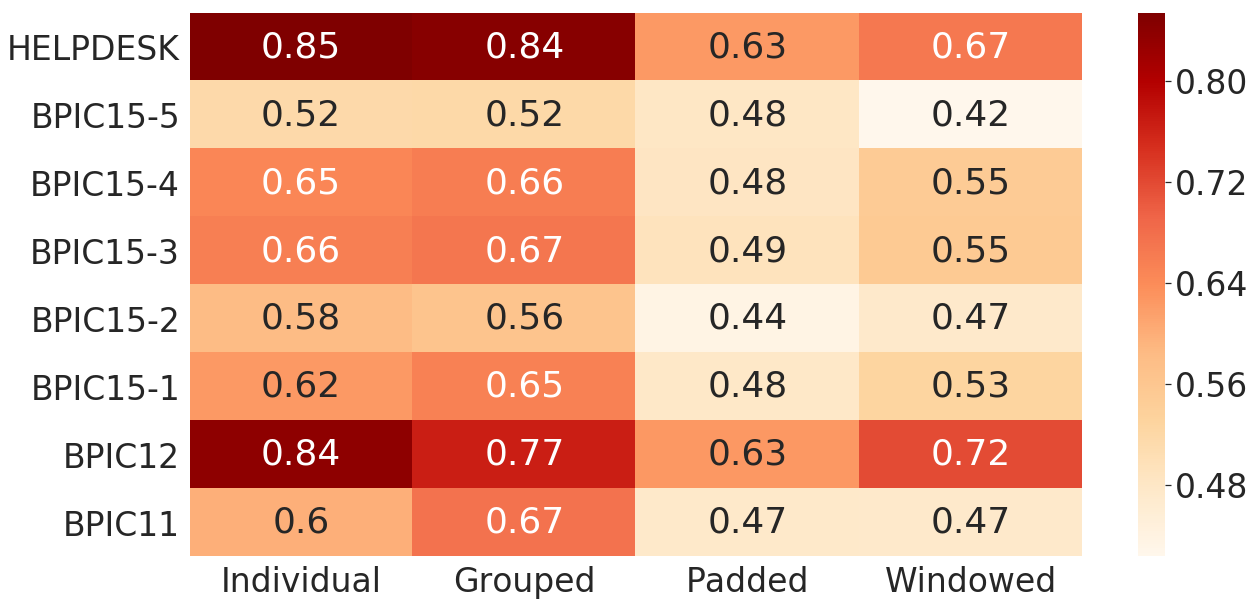

In [78]:
model_fns = ['evermann','schoenig', 'sp2', 'pfs']
mode_fns  = ['individual', 'grouped', 'padded', 'windowed']

def get_max_accuracies(dataset_name):
    df = pd.DataFrame(columns=['Model', 'Strategy', 'Accuracy'])
    
    for mdl in model_fns:
        for mdo in mode_fns:
            stats_df = pd.read_pickle('/home/felix.wolff2/docker_share/{0}/{1}_{2}_stats.pickled'.format(dataset_name, mdl, mdo))
            acc = stats_df['val_acc'].max()
            df = df.append({'Model': mdl, 'Strategy': mdo, 'Accuracy': acc}, ignore_index=True)

    return df

def build_mean_acc_df(listOfDataSetNames):
    treatDsName = lambda x: x.upper().replace('_','-').replace('20','')
    treatModeName = lambda x: x.capitalize()
    cols = list(map(treatModeName, mode_fns))
    ds_index = list(map(treatDsName, listOfDataSetNames))
    df = pd.DataFrame(columns=cols, index=ds_index, dtype=np.float)

    for ds_name in listOfDataSetNames:
        max_acc_df = get_max_accuracies(ds_name)
        
        for mdo in mode_fns:
            variance = max_acc_df[max_acc_df['Strategy'] == mdo]['Accuracy'].mean()
            df.loc[treatDsName(ds_name), treatModeName(mdo)] = variance
            
        #df.loc[ds_name] = df.loc[ds_name] / df.loc[ds_name].max()
    
    return df

acc_macc_df = build_mean_acc_df(['helpdesk','bpic2015_5','bpic2015_4','bpic2015_3','bpic2015_2','bpic2015_1','bpic2012','bpic2011'])
sns.heatmap(acc_macc_df, cmap="OrRd", annot=True)

print(acc_macc_df.round(3).to_latex(bold_rows=True))

# SP-2 usefulness with activity count

Calculate how many standard deviations the SP-2 outperforms the mean performance of the three top performing models

In [ ]:
model_fns = ['evermann','schoenig', 'sp2', 'pfs']
mode_fns  = ['individual', 'grouped', 'padded', 'windowed']

def get_max_accuracies(dataset_name):
    df = pd.DataFrame(columns=['Model', 'Strategy', 'Accuracy'])
    
    for mdl in model_fns:
        for mdo in mode_fns:
            stats_df = pd.read_pickle('/home/felix.wolff2/docker_share/{0}/{1}_{2}_stats.pickled'.format(dataset_name, mdl, mdo))
            acc = stats_df['val_acc'].max()
            df = df.append({'Model': mdl, 'Strategy': mdo, 'Accuracy': acc}, ignore_index=True)

    return df

def build_std_offset_df(listOfDataSetNames):
    df = pd.DataFrame(columns=model_fns, index=listOfDataSetNames, dtype=np.float)

    for ds_name in listOfDataSetNames:
        max_acc_df = get_max_accuracies(ds_name)
        
        mean_acc = max_acc_df[max_acc_df['Strategy'] == 'grouped']['Accuracy'].mean()
        mean_std = max_acc_df[max_acc_df['Strategy'] == 'grouped']['Accuracy'].std()
        
        for mdl in model_fns:
            v = max_acc_df[(max_acc_df['Strategy'] == 'grouped') & (max_acc_df['Model'] == mdl)]['Accuracy'].values[0] - mean_acc

            v = v/mean_std
            df.loc[ds_name, mdl] = v
                
    return df

acc_std_offset_df = build_std_offset_df(['bpic2015_5','bpic2015_4','bpic2015_3','bpic2015_2','bpic2015_1','bpic2012','bpic2011'])
sns.heatmap(acc_std_offset_df, cmap="OrRd_r", annot=True)

In [83]:
get_max_accuracies('helpdesk').sort_values(['Accuracy'], ascending=False)

,Model,Strategy,Accuracy
12,pfs,individual,0.861626
4,schoenig,individual,0.854419
0,evermann,individual,0.852532
9,sp2,grouped,0.848899
8,sp2,individual,0.847969
14,pfs,padded,0.846601
1,evermann,grouped,0.846221
13,pfs,grouped,0.845738
5,schoenig,grouped,0.836314
6,schoenig,padded,0.829618


In [37]:
from batchers.GroupedBatcher import GroupedBatcher as data_formatter


,concept:name
0,1
1,8
2,6
